# Notebook to read raw recipe file, clean data and save to a new csv file

the original data files are over 800MB,  they are from Kaggle (https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions.  Due to the large size of the data file. They are not uploaded to this repo.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Cleaning for Recipe Dataset

In [2]:
## Code adapted from reference https://www.kaggle.com/etsc9287/food-com-eda-and-text-analysis 
## read recipe file

recipes = pd.read_csv('data/RAW_recipes.csv')

In [3]:
#show number of rows and columns of the recipe dataset
recipes.shape

(231637, 12)

In [4]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


**Find missing Values and clean the data**

In [5]:
recipes.isnull().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [6]:
# drop missing rows and reassign the dataframe name to df
df = recipes.dropna()
print(df.shape)

(226657, 12)


In [7]:
# display one recipe with all contents in all column, to show the strcuture of the data
pd.set_option("max_colwidth", 200) 
df.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event',...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piec...","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7


**Nutritional values extraction** <br>
The nutrition column is a list reprensent Calories and percentage daily value of total_fat, sugar, sodium, protein, sat_fat, carbs

In [8]:
# list the names of the nutrition column represents.
nutrition_names = ["calories", "total_fat", "sugar", "sodium", "protein", "sat_fat", "carbs"]

In [9]:
# Create new columns for each nutrition item in the dataframe
for i, nutrition_name in enumerate(nutrition_names):
    df[nutrition_name] = df['nutrition'].map(lambda s: eval(s)[i])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#Show all columns of the new data frame including the nutrtition columns
pd.set_option('display.max_columns', 0)
print(df.shape)
df.head(1)

(226657, 19)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,sat_fat,carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event',...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piec...","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0


**Take a look at cooking time, the 'minutes' column of the dataframe**

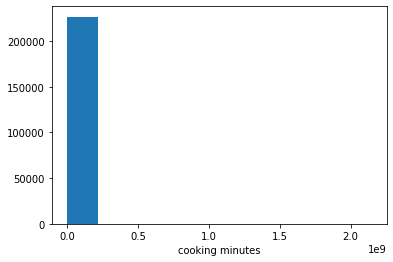

In [11]:
plt.xlabel("cooking minutes")
plt.hist(df['minutes']);  # find strange outliers 


In [12]:
#Check the top 10 longest value for cooking time in minutes
sorted(df.minutes, reverse=True)[0:10]

[2147483647,
 1051200,
 288000,
 259260,
 259205,
 216015,
 201610,
 187200,
 172810,
 172800]

In [13]:
2147483647/60/24/365

4085.7755840943687

**If prepare time of a dish is too long, we may not intesteds** 

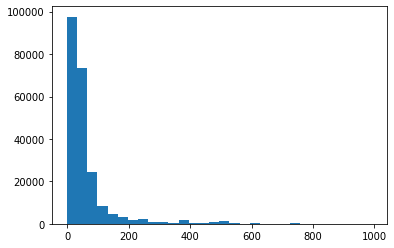

In [14]:
#choose recipe prepare time less than 1000 minutes
df = df[df['minutes']<1_000]
plt.hist(df['minutes'], bins=30);

(212195, 19)


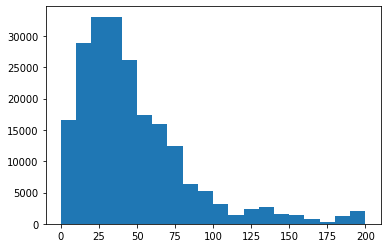

In [15]:
# Since we have enough data, let's only choose cooking time < 200 minutes
df = df[df['minutes']<201] 
print(df.shape)
# plt.xscale('log')
plt.hist(df['minutes'], bins=20);

In [16]:
print(f"There are {df.shape[0]} choosen recepies in the dataframe : ")
print()
print(f"Average cooking time: {round(df['minutes'].mean(),2)}")
print(f"Median cooking time: {df['minutes'].median()}")
print(f"Maximum cooking time: {df['minutes'].max()}")

There are 212195 choosen recepies in the dataframe : 

Average cooking time: 44.98
Median cooking time: 35.0
Maximum cooking time: 200


**Number of Cooking Steps**

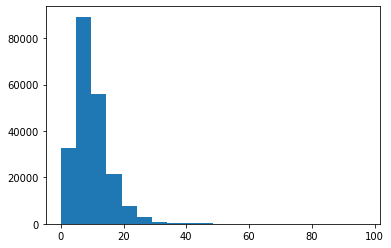

In [17]:
plt.hist(df['n_steps'], bins=20);

(208088, 19)


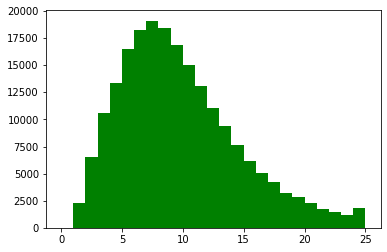

In [18]:
# Since we have enough data, let's only use number of steps <= 25
df = df[df['n_steps']<=25] 
print(df.shape)
plt.hist(df['n_steps'], bins=25, color='green');

In [19]:
print(f"There are {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of cooking steps: {round(df['n_steps'].mean(),2)}")
print(f"Median number of cooking steps:: {df['n_steps'].median()}")
print(f"Maximum number of cooking steps:: {df['n_steps'].max()}")

There are 208088 chosen recepies: 

Average number of cooking steps: 9.25
Median number of cooking steps:: 8.0
Maximum number of cooking steps:: 25


**Number of Ingredients**

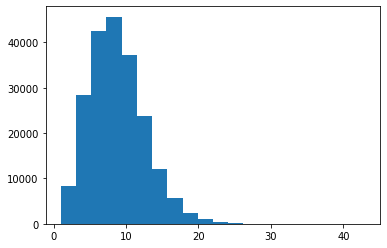

In [20]:
plt.hist(df['n_ingredients'], bins=20);

(207031, 19)


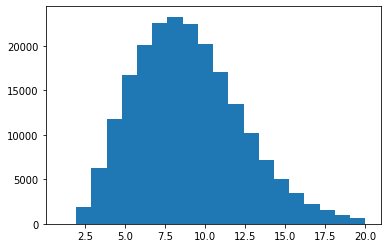

In [21]:
# Since we have enough data, let's only use number of ingredient <= 20
df = df[df['n_ingredients']<=20] 
print(df.shape)
plt.hist(df['n_ingredients'], bins=20);

In [22]:
print(f"There are {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of ingredients: {round(df['n_ingredients'].mean(),2)}")
print(f"Median number of ingredients:: {df['n_ingredients'].median()}")
print(f"Maximum number of ingredients: {df['n_ingredients'].max()}")

There are 207031 chosen recepies: 

Average number of ingredients: 8.85
Median number of ingredients:: 9.0
Maximum number of ingredients: 20


**Nutritional Facts**

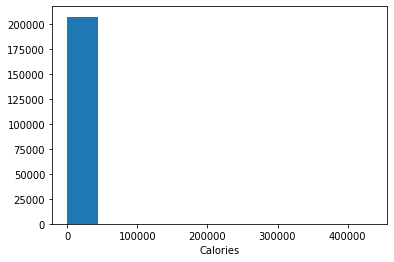

In [23]:
#Distribution of Calories
plt.xlabel("Calories")
plt.hist(df['calories']);

(193249, 19)


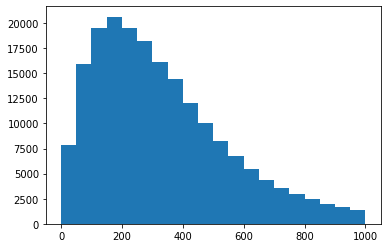

In [24]:
# Since we have enough data, let's only use number of clories <= 2_000
df = df[df['calories']<=1_000] 
print(df.shape)
plt.hist(df['calories'], bins=20);

In [25]:
print(f"There are {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of calories: {round(df['calories'].mean(),2)}")
print(f"Median number of calories: {df['calories'].median()}")
print(f"Maximum number of calories: {df['calories'].max()}")

There are 193249 chosen recepies: 

Average number of calories: 328.5
Median number of calories: 285.6
Maximum number of calories: 1000.0


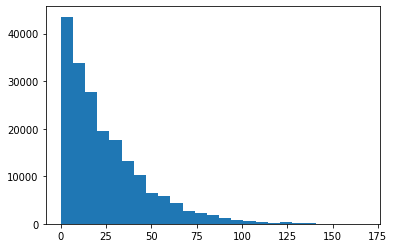

In [26]:
#Distribution of total fat
plt.hist(df['total_fat'], bins=25);

In [27]:
print(f"There are {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of total_fat: {round(df['total_fat'].mean(),2)}")
print(f"Median number of total_fat: {df['total_fat'].median()}")
print(f"Maximum number of total_fat: {df['total_fat'].max()}")

There are 193249 chosen recepies: 

Average number of total_fat: 24.23
Median number of total_fat: 18.0
Maximum number of total_fat: 168.0


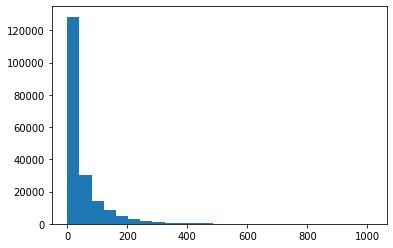

In [28]:
#Distribution of suter
plt.hist(df['sugar'], bins=25);

There are 192342 chosen recepies: 

Average number of sugar: 46.4
Median number of sugar: 22.0
Maximum number of sugar: 500.0


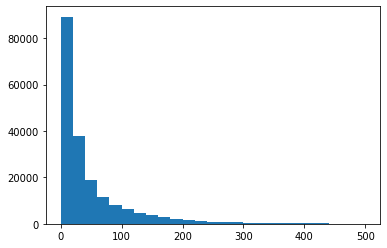

In [29]:
# Since we have enough data, let's only use number of clories <= 500
df = df[df['sugar']<=500] 
print(f"There are {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of sugar: {round(df['sugar'].mean(),2)}")
print(f"Median number of sugar: {df['sugar'].median()}")
print(f"Maximum number of sugar: {df['sugar'].max()}")
plt.hist(df['sugar'], bins=25);

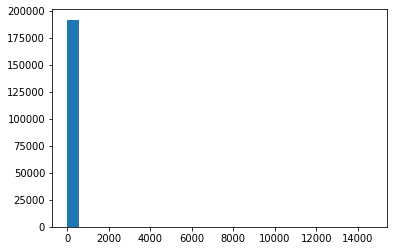

In [30]:
#Distribution of sodium
plt.hist(df['sodium'], bins=25);

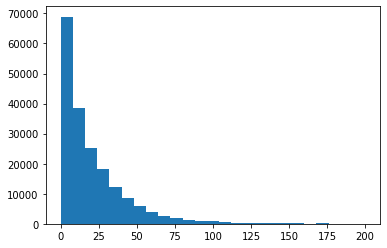

In [31]:
# Since we have enough data, let's only use sodium <= 200
df = df[df['sodium']<=200] 
plt.hist(df['sodium'], bins=25);

In [32]:
print(f"There are {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of sodium: {round(df['sodium'].mean(),2)}")
print(f"Median number of sodium: {df['sodium'].median()}")
print(f"Maximum number of sodium: {df['sodium'].max()}")

There are 191481 chosen recepies: 

Average number of sodium: 20.06
Median number of sodium: 13.0
Maximum number of sodium: 200.0


There are 191481 chosen recepies: 

Average number of protein: 27.51
Median number of protein: 15.0
Maximum number of protein: 342.0


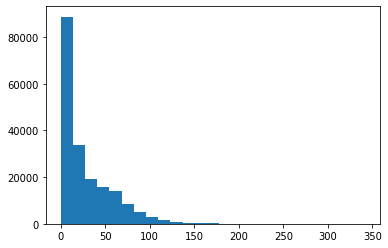

In [33]:
#Distribution of protein
print(f"There are {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of protein: {round(df['protein'].mean(),2)}")
print(f"Median number of protein: {df['protein'].median()}")
print(f"Maximum number of protein: {df['protein'].max()}")
plt.hist(df['protein'], bins=25);

There are 191481 chosen recepies: 

Average number of saturated fat: 30.76
Median number of saturated fat: 20.0
Maximum number of saturated fat: 471.0


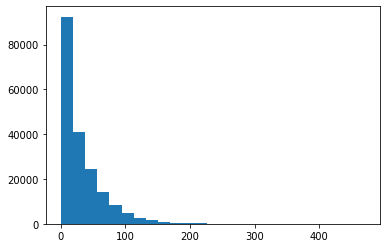

In [34]:
#Distribution of saturated fat
print(f"There are {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of saturated fat: {round(df['sat_fat'].mean(),2)}")
print(f"Median number of saturated fat: {df['sat_fat'].median()}")
print(f"Maximum number of saturated fat: {df['sat_fat'].max()}")
plt.hist(df['sat_fat'], bins=25);

There are 191481 chosen recepies: 

Average number of carbohydrates: 10.06
Median number of carbohydrates: 8.0
Maximum number of carbohydrates: 82.0


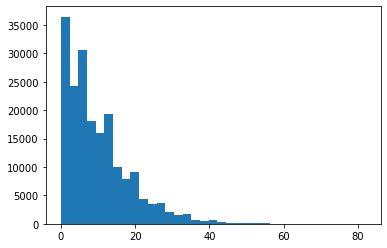

In [35]:
#Distribution of carbohydrates
print(f"There are {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of carbohydrates: {round(df['carbs'].mean(),2)}")
print(f"Median number of carbohydrates: {df['carbs'].median()}")
print(f"Maximum number of carbohydrates: {df['carbs'].max()}")
plt.hist(df['carbs'], bins=35);

In [36]:
#check datafram after cleaning
df.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,sat_fat,carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event',...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piec...","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0


In [37]:
# #Investigage the ingradient columns. check a random one..
# df['ingredients'][101]

In [38]:
# df['ingredients'] = df['ingredients'].map(lambda s: s.strip('[').strip(']').replace("'", "").split(', '))

In [39]:
# len(df['ingredients'])

In [40]:
# df.head(1)

In [41]:
#ingradients column is now a list of words. Save this dataframe to a new .csv file.
df.to_csv('organized_recipes.csv', index=False)

# Data Cleaning for User Review Dataset

In [42]:
# load dataset
ratings = pd.read_csv("data/RAW_interactions.csv")

In [43]:
#check the size of data and features
print(ratings.shape)
ratings.head()

(1132367, 5)


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 ..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"


In [44]:
#find missing values
ratings.isnull().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

In [45]:
#Only 169 out of 1,132,367 recipies has emply reviews
#drop recipes with missing values 
df = ratings.dropna()

In [46]:
# Exam 'rating' columns, rating 0-5.
df['rating'].value_counts()

5    816229
4    187333
0     60847
3     40852
2     14122
1     12815
Name: rating, dtype: int64

In [47]:
# Drop recipe with rating 0, because they may be empty entry
df = df[df['rating']!=0]

In [48]:
print(df.shape)
df.head()

(1071351, 5)


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 ..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"


In [49]:
df['rating'].value_counts(normalize=True)

5    0.761869
4    0.174857
3    0.038131
2    0.013181
1    0.011962
Name: rating, dtype: float64

In [50]:
#save file to a new csv file
df.to_csv('cleaned_reviews.csv', index=False)